## 計測データの集計

In [1]:
import pandas as pd
import mdfreader
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'


In [2]:
fname = "./2023_0516_160039_414/todo$0$0.mf4"

yop = mdfreader.MdfInfo()
signal_list = yop.list_channels(fname)

signal_list

['NR_Unit1Ch1_Ax11(0x191s)',
 'NR_Unit1Ch2_Ay11(0x191s)',
 'NR_Unit1Ch3_Ax12(0x192s)',
 'NR_Unit1Ch4_Ay12(0x192s)',
 'NR_Unit1Ch5_Az11(0x291s)',
 'NR_Unit1Ch6_Az12(0x292s)',
 'Time']

### 対象のシグナルをcsv化する

In [32]:
inst = mdfreader.Mdf(fname, 
                        channel_list=signal_list, 
                        convert_after_read=False)

df = pd.DataFrame()

for key in signal_list:
    if key.find('Az12') > 0:
        df[key] = inst[key]['data']
    if key in 'Time':
        df[key] = inst[key]['data']

df = df.set_index('Time')
df.head

#df.to_csv('inst.csv')


<bound method NDFrame.head of          NR_Unit1Ch6_Az12(0x292s)
Time                             
0.00                          0.0
0.01                   16981032.0
0.02                   16980944.0
0.03                   16985452.0
0.04                   16988994.0
...                           ...
7199.95                16981872.0
7199.96                16975448.0
7199.97                16975686.0
7199.98                16980084.0
7199.99                16984692.0

[720000 rows x 1 columns]>

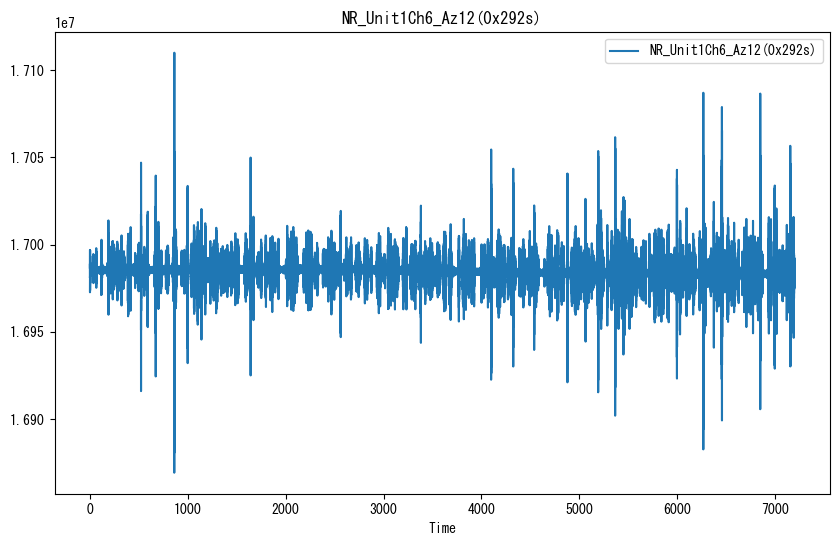

In [36]:
# 一つでも0の行を削除
dfplt = df.copy()
for row in dfplt.index:
    if (dfplt.loc[row] == 0).any():
        dfplt.drop(row, axis=0, inplace=True)

dfplt.plot(title=df.columns[0],
          figsize=(10, 6));
